# CIFAR-10 Object Recognition using ResNet50

Contains 60k img of 32x32 img and having 10 different classes

In [1]:
# Function to check the package is missing or not
def install_if_missing(package):
    try:
        __import__(package)
    except ImportError:
        print(f"Package '{package}' not found. Install the package from cmd using ")
        print(f"pip install {package}")
        
# Check & install required packages
install_if_missing("kaggle")
install_if_missing("py7zr")

# Importing the files
from zipfile import ZipFile
import kaggle
import py7zr
print("All dependencies are available.")    

All dependencies are available.


In [2]:
import os

data_folder = "data"
abs_data_path = os.path.abspath(data_folder)

# Create data directory if needed,
if not os.path.exists(data_folder):
    print("data directory does not exist. Creating data directory.")
    os.makedirs(data_folder)

    print("Downloading CIFAR-10 dataset...")
    os.system('kaggle competitions download -c cifar-10 -p data')
    print("Download complete.")

    # Extract main zip
    print("Unzipping main cifar-10.zip...")
    zip_path = os.path.join(data_folder, "cifar-10.zip")
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_folder)

    print(f"Main dataset unzipped at: {abs_data_path}")

else:
    print("data directory exists.")
    if os.listdir(data_folder):
        print("Directory is not empty. Skipping download.")
    else:
        print("Directory is empty. Downloading CIFAR-10...")
        os.system('kaggle competitions download -c cifar-10 -p data')

        zip_path = os.path.join(data_folder, "cifar-10.zip")
        with ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_folder)

        print(f"Main dataset unzipped at: {abs_data_path}")


# =======================
# Extract TRAIN.7z
# =======================
train_7z = os.path.join(data_folder, "train.7z")
train_output = os.path.join(data_folder, "train")

if os.path.exists(train_7z):
    print("\nExtracting train.7z ...")
    os.makedirs(train_output, exist_ok=True)
    with py7zr.SevenZipFile(train_7z, mode='r') as z:
        z.extractall(path=train_output)

    print(f"Train data extracted at: {os.path.abspath(train_output)}")
else:
    print("\ntrain.7z not found!")


# =======================
# Extract TEST.7z if you want to extract the test file also by uncommenting the below code
# =======================
# test_7z = os.path.join(data_folder, "test.7z")
# test_output = os.path.join(data_folder, "test")

# if os.path.exists(test_7z):
#     print("\nExtracting test.7z ...")
#     os.makedirs(test_output, exist_ok=True)
#     with py7zr.SevenZipFile(test_7z, mode='r') as z:
#         z.extractall(path=test_output)

#     print(f"Test data extracted at: {os.path.abspath(test_output)}")
# else:
#     print("\ntest.7z not found!")


# =======================
# FINAL PATH PRINTS
# =======================
print("\n===== FINAL PATHS =====")
print(f"Main dataset: {abs_data_path}")
print(f"Train images: {os.path.abspath(train_output)}")
# print(f"Test images:  {os.path.abspath(test_output)}")

data directory exists.
Directory is not empty. Skipping download.

Extracting train.7z ...
Train data extracted at: d:\Deep Learning Projects\Project_4_CIFAR-10_object_recognition_using_ResNet50_1\data\train

===== FINAL PATHS =====
Main dataset: d:\Deep Learning Projects\Project_4_CIFAR-10_object_recognition_using_ResNet50_1\data
Train images: d:\Deep Learning Projects\Project_4_CIFAR-10_object_recognition_using_ResNet50_1\data\train


### Importing dependencies

In [3]:
import os 
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [4]:
original_filenames = 'data/train/train/'
filenames = os.listdir(original_filenames)
print("The number of images in data are:", len(filenames))
print("type of filenames:", type(filenames))

The number of images in data are: 50000
type of filenames: <class 'list'>


In [5]:
print("First 10 filenames in the dataset are:")
print(filenames[0:5])
print("Last 5 filenames in the dataset are:")
print(filenames[-5:])

First 10 filenames in the dataset are:
['1.png', '10.png', '100.png', '1000.png', '10000.png']
Last 5 filenames in the dataset are:
['9995.png', '9996.png', '9997.png', '9998.png', '9999.png']


### Label Processing

In [6]:
labels_df = pd.read_csv('data/trainLabels.csv')
# Shape of the labels dataframe
labels_df.shape

(50000, 2)

In [7]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


Here filenames are the ID of the label

In [8]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [9]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [10]:
# # One hot encoding the labels
# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder()
# labels_onehot = onehotencoder.fit_transform(labels_df[['label']]).toarray()
# labels_onehot.shape

# Manually encoding the labels
label_dictionary = {
    'airplane':0,
    'automobile':1,
    'bird':2,
    'cat':3,
    'deer':4,
    'dog':5,
    'frog':6,
    'horse':7,
    'ship':8,
    'truck':9
}

# Mapping the labels
labels = [label_dictionary[item] for item in labels_df['label']]
print("First 5 labels after encoding are:", labels[0:5])

First 5 labels after encoding are: [6, 9, 9, 4, 1]


In [11]:
# displaying sample images 
"""
import cv2
img = cv2.imread(original_filenames + filenames[45888])
cv2.imshow("Sample Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("Image shape:", img.shape)

"""

'\nimport cv2\nimg = cv2.imread(original_filenames + filenames[45888])\ncv2.imshow("Sample Image", img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\nprint("Image shape:", img.shape)\n\n'

In [12]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [13]:
id_list = labels_df['id'].tolist()
id_list[0:5]

[1, 2, 3, 4, 5]

### Image Processing

In [14]:
# Convert images to numpy arrays and store in a list
train_data_folder = original_filenames

data = []
for id in id_list:
    img = Image.open(train_data_folder + str(id) + '.png')
    img_array = np.array(img)
    data.append(img_array)

In [15]:
type(data)

list

In [16]:
len(data)

50000

In [17]:
type(data[0])

numpy.ndarray

In [18]:
data[0].shape

(32, 32, 3)

In [19]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [20]:
# Convert images and labels to numpy arrays
X = np.array(data)
y = np.array(labels)

In [21]:
print("Shape of X (images):", X.shape)
print("Shape of y (labels):", y.shape)

Shape of X (images): (50000, 32, 32, 3)
Shape of y (labels): (50000,)


In [22]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
print("Shape of X (images):", X.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X (images): (50000, 32, 32, 3)
Shape of X_train: (40000, 32, 32, 3)
Shape of X_test: (10000, 32, 32, 3)


In [24]:
# Scaling the images
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0
print("Image data scaled successfully.")

Image data scaled successfully.


In [25]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

### Building the neural network

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
no_of_classes = 10

# Setting up the layers of neural network
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(32, 32, 3)),
   keras.layers.Dense(64, activation='relu'),
   keras.layers.Dense(no_of_classes, activation='softmax')
])

In [28]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']) 

In [29]:
# Training the model
model.fit(X_train_scaled, y_train,validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 8s 5ms/step - loss: 1.9381 - acc: 0.2982 - val_loss: 1.9196 - val_acc: 0.3022
Epoch 2/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.8139 - acc: 0.3497 - val_loss: 1.8156 - val_acc: 0.3492
Epoch 3/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.7712 - acc: 0.3696 - val_loss: 1.7338 - val_acc: 0.3725
Epoch 4/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.7436 - acc: 0.3804 - val_loss: 1.6986 - val_acc: 0.4030
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7233 - acc: 0.3876 - val_loss: 1.7331 - val_acc: 0.3895
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7132 - acc: 0.3933 - val_loss: 1.7323 - val_acc: 0.3873
Epoch 7/10
1125/1125 [==============================] - 6s 6ms/step - loss: 1.6994 - acc: 0.3969 - val_loss: 1.7452 - val_acc: 0.3738
Epoch 8/10
1125/1125 [==============================] - 7s 6ms

### ResNet50

In [30]:
# Using the resnet50 model from keras applications
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers
    

In [ ]:
# Convolutional base model
convolutional_base = ResNet50(weights='imagenet',
                               include_top=False,
                               input_shape=(256, 256, 3))
# convolutional_base.summary()


In [37]:
model = models.Sequential()
model.add(layers.UpSampling2D(size=(2, 2))) # Height and Width will be doubled
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(convolutional_base) # Passing the resnet50 base model
model.add(layers.Flatten()) # Converting matrix to a vector
model.add(layers.BatchNormalization()) # Normalizing the inputs
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5)) # Dropout to avoid overfitting
model.add(layers.BatchNormalization())
model.add(layers.Dense(no_of_classes, activation='relu'))


In [39]:
# Model Compilation
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# Fitting model
# Using Batch size of 32 due to hardware limitations
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

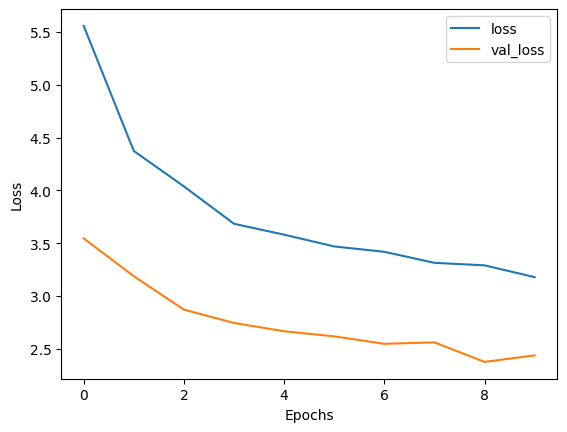

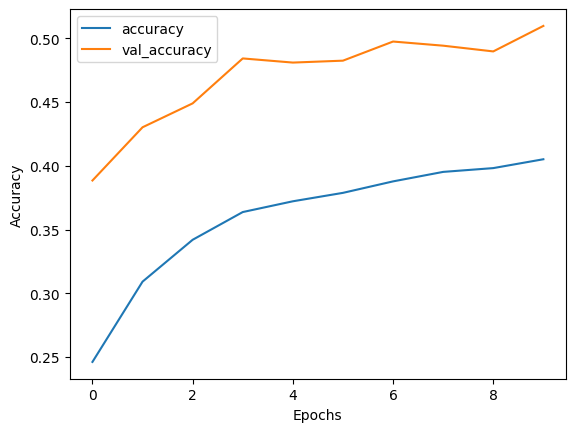

In [ ]:
h = history

# Plot the loss function value
plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(h.history['acc'], label='accuracy')
plt.plot(h.history['val_acc'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()